<p><font size="6"><b>06 - Pandas: "Group by" operations</b></font></p>

> *© 2016-2018, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Some 'theory': the groupby operation (split-apply-combine)

In [2]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
4,10,B
5,15,C
6,10,A
7,15,B
8,20,C


### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [3]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [4]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="../img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [5]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [6]:
df.groupby('key').aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


And many more methods are available. 

In [7]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

# Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [8]:
df = pd.read_csv("../data/titanic.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Using groupby(), calculate the average age for each sex.</li>
</ul>
</div>

In [10]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [11]:
# %load _solutions/pandas_06_groupby_operations1.py
df.groupby('Sex')['Age'].mean()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers.</li>
</ul>
</div>

In [21]:
df['Survived'].sum()/len(df)

0.3838383838383838

In [14]:
# %load _solutions/pandas_06_groupby_operations2.py
# df['Survived'].sum() / len(df['Survived'])
df['Survived'].mean()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate this survival ratio for all passengers younger than 25 (remember: filtering/boolean indexing).</li>
</ul>
</div>

In [25]:
young = df[df['Age'] < 25]
young['Survived'].sum()/len(young)

0.4244604316546763

In [23]:
# %load _solutions/pandas_06_groupby_operations3.py
df25 = df[df['Age'] < 25]
df25['Survived'].sum() / len(df25['Survived'])

0.4244604316546763

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the difference in the survival ratio between the sexes?</li>
</ul>
</div>

In [26]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [27]:
# %load _solutions/pandas_06_groupby_operations4.py
df.groupby('Sex')['Survived'].mean()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot of the survival ratio for the different classes ('Pclass' column).</li>
</ul>
</div>

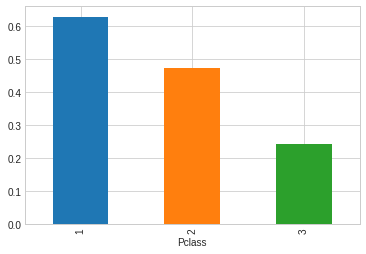

In [29]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

In [ ]:
# %load _solutions/pandas_06_groupby_operations5.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is devided is separate classes using the `pd.cut` function as provided below.</li>
</ul>
</div>

In [ ]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

In [ ]:
# %load _solutions/pandas_06_groupby_operations6.py

If you are ready, more groupby exercises can be found below.

# Some more theory

## Specifying the grouper

In the previous example and exercises, we always grouped by a single column by passing its name. But, a column name is not the only value you can pass as the grouper in `df.groupby(grouper)`. Other possibilities for `grouper` are:

- a list of strings (to group by multiple columns)
- a Series (similar to a string indicating a column in df) or array
- function (to be applied on the index)
- levels=[], names of levels in a MultiIndex

In [ ]:
df.groupby(df['Age'] < 18)['Survived'].mean()

In [ ]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean()

## The size of groups - value counts

Oftentimes you want to know how many elements there are in a certain group (or in other words: the number of occurences of the different values from a column).

To get the size of the groups, we can use `size`:

In [ ]:
df.groupby('Pclass').size()

In [ ]:
df.groupby('Embarked').size()

Another way to obtain such counts, is to use the Series `value_counts` method:

In [ ]:
df['Embarked'].value_counts()

# [OPTIONAL] Additional exercises using the movie data

These exercises are based on the [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/) (so credit to him!) and the datasets he prepared for that. You can download these data from here: [`titles.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKajNMa1pfSzN6Q3M) and [`cast.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKal9UYTJSR2ZhSW8) and put them in the `/data` folder.

`cast` dataset: different roles played by actors/actresses in films

- title: title of the movie
- year: year it was released
- name: name of the actor/actress
- type: actor/actress
- n: the order of the role (n=1: leading role)

In [ ]:
cast = pd.read_csv('../data/cast.csv')
cast.head()

`titles` dataset:

* title: title of the movie
* year: year of release

In [ ]:
titles = pd.read_csv('../data/titles.csv')
titles.head()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Using `groupby()`, plot the number of films that have been released each decade in the history of cinema.</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations7.py

In [ ]:
# %load _solutions/pandas_06_groupby_operations8.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Use `groupby()` to plot the number of 'Hamlet' movies made each decade.</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations9.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>For each decade, plot all movies of which the title contains "Hamlet".</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations10.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations11.py

In [ ]:
# %load _solutions/pandas_06_groupby_operations12.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>In a previous exercise, the number of 'Hamlet' films released each decade was checked. Not all titles are exactly called 'Hamlet'. Give an overview of the titles that contain 'Hamlet' and an overview of the titles that start with 'Hamlet',  each time providing the amount of occurrences in the data set for each of the movies</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations13.py

In [ ]:
# %load _solutions/pandas_06_groupby_operations14.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>List the 10 movie titles with the longest name.</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations15.py

In [ ]:
# %load _solutions/pandas_06_groupby_operations16.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations17.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What are the 11 most common character names in movie history?</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations18.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Plot how many roles Brad Pitt has played in each year of his career.</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations19.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What are the 10 most occurring movie titles that start with the words 'The Life'?</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations20.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Which actors or actresses were most active in the year 2010 (i.e. appeared in the most movies)?</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations21.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Determine how many roles are listed for each of 'The Pink Panther' movies.</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations22.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> List, in order by year, each of the movies in which 'Frank Oz' has played more than 1 role.</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations23.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> List each of the characters that Frank Oz has portrayed at least twice.</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations24.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> Add a new column to the `cast` DataFrame that indicates the number of roles for each movie. [Hint](http://pandas.pydata.org/pandas-docs/stable/groupby.html#transformation)</li>
</ul>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations25.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> Calculate the ratio of leading actor and actress roles to the total number of leading roles per decade. </li>
</ul><br>

**Tip**: you can do a groupby twice in two steps, first calculating the numbers, and secondly, the ratios.
</div>


In [ ]:
# %load _solutions/pandas_06_groupby_operations26.py

In [ ]:
# %load _solutions/pandas_06_groupby_operations27.py

In [ ]:
# %load _solutions/pandas_06_groupby_operations28.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> In which years the most films were released?</li>
</ul><br>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations29.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s? And in 2000s?</li>
</ul><br>
</div>

In [ ]:
# %load _solutions/pandas_06_groupby_operations30.py

In [ ]:
# %load _solutions/pandas_06_groupby_operations31.py